# Projet ML: 
#####                            Ovia Chanemouganandam et Sandrine Daniel - DIA 4

In [300]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os

#### Step 1:
1. Import dataset

In [301]:
df =pd.read_csv('data/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


2. Number of columns and rows

In [302]:
print("Number of columns:", df.shape[1])
print("Number of rows:", df.shape[0])

Number of columns: 50
Number of rows: 101766


3.  Variable Definition


The dataset contains information about patients and their medical history. The target variable is **`readmitted`**, which indicates whether a patient was readmitted to the hospital. The dataset has the following columns:

| Feature | Type | Description |
|---------|------|-------------|
| `encounter_id` | Numeric / ID | Unique identifier for an encounter |
| `patient_id` | Numeric / ID | Unique identifier for each patient |
| `race` | Categorical | 	Values: Caucasian, Asian, African American, Hispanic, and other |
| `admission_type` | Categorical | Type of hospital admission (e.g., Emergency, Elective) |
| `admission_source_id` | Categorical | Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital|
| `discharge_disposition` | Categorical | How the patient was discharged (e.g., home, transferred) |
| `weight` | Categorical | Weight in pounds |
| `age` | Numeric | Age of the patient in years |
| `gender` | Categorical | Gender of the patient (Male/Female) |
| `num_lab_procedures` | Numeric | Number of lab tests performed during the stay |
| `num_medications` | Numeric | Number of medications prescribed during the stay |
| `time_in_hospital` | Numeric | Number of days spent in the hospital |
| `payer_code` |  Categorical | Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay|
| `Medical_specialty`| Categorical | Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct value|
| `diag_1` | Categorical | Primary diagnosis code |
| `diag_2` | Categorical | Secondary diagnosis code |
| `diag_3` | Categorical | Tertiary diagnosis code |
| `num_procedures` | Numeric | Number of procedures performed during the stay |
| `num_outpatient` | Numeric | Number of outpatient visits in the past year |
| `num_emergency` | Numeric | Number of emergency visits in the past year |
| `number_diagnoses` | Numeric | Number of diagnoses entered to the system|
| `max_glu_serum`| Categorical | Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured |
| `A1Cresult` | Categorical | Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured|
| `For the 23 columns ex: metformin to -> metformin - pioglitazone`  | Categorical | The feature indicates whether the drug was prescribed or there was a change in the dosage |
| `num_inpatient` | Numeric | Number of prior inpatient visits in the past year |
| `change`| Categorical | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: change and no change |
| `diabetesMed` | Categorical | Indicates if there was any diabetic medication prescribed. Values: yes and no |
| `readmitted` | Categorical | Target variable: 
  - `0` = Not readmitted  
  - `1` = Readmitted in less than 30 days  
  - `2` = Readmitted after 30 days or more |





In [303]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

4. Handling missing values

In [304]:
print("Number of missing values per column:")
print(df.isna().sum())

Number of missing values per column:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride

During the visualization of the dataset we noticed that some columns had '?' instead of NaN, we will now replace them with proper missing values

In [305]:
print("Number of missing values after replacing '?' with nAn:")
df.replace('?', np.nan, inplace=True)
print(df.isna().sum())

Number of missing values after replacing '?' with nAn:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide             

The colulmns 'weight', 'payer_code', 'medical_specialty' have more than 50% of missing values, we will therefore drop these columns

In [306]:
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

Let's delete the missing values of these columns : 'diag1','diag2','diag3','race' (the number of these missing values is really inferior to the number of lines)

In [307]:
df=df.dropna(subset=['diag_1','diag_2','diag_3','race'])
print(df.isna().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               92845
A1Cresult                   81860
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In the csv, the columns "max_glu_serum" and "A1Cresult" have mostly "None" values that the notebook considers as Nan

Let's fix this issue 

In [308]:
df["max_glu_serum"] = df["max_glu_serum"].fillna("Test not taken")
df["A1Cresult"] = df["A1Cresult"].fillna("Test not taken")
print(df.isna().sum()) 

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [309]:
print("Number of columns after cleaning:", df.shape[1])
print("Number of rows after cleaning:", df.shape[0])

Number of columns after cleaning: 47
Number of rows after cleaning: 98053


5. Handling duplicates

In [310]:
print(df.duplicated().sum())
print(df.shape)

0
(98053, 47)


6. Data description and balance

In [311]:
df.describe(include='object') #For categorial variables


,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98053,98053,98053,98053,98053,98053,98053,98053,98053,98053,...,98053,98053,98053,98053,98053,98053,98053,98053,98053,98053
unique,5,3,10,713,740,786,4,4,4,4,...,1,4,4,2,2,1,2,2,2,3
top,Caucasian,Female,[70-80),428,428,250,Test not taken,Test not taken,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
freq,75079,52833,25306,6730,6517,11208,92845,81860,78808,96530,...,98053,45943,97384,98040,98052,98053,98052,52774,75351,52338


In [312]:
df.describe() #for numerical variables

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.805300e+04,9.805300e+04,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,1.658294e+08,5.484792e+07,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,0.376378,0.202462,0.646864,7.512060
std,1.024322e+08,3.866175e+07,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,1.283359,0.942892,1.271020,1.832497
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,8.528566e+07,2.350234e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.533019e+08,4.687790e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.305007e+08,8.800306e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Now we check the data balance

In [313]:
df['readmitted'].value_counts(normalize=True)


readmitted
NO     0.533773
>30    0.353370
<30    0.112857
Name: proportion, dtype: float64

7. Correlation analysis 

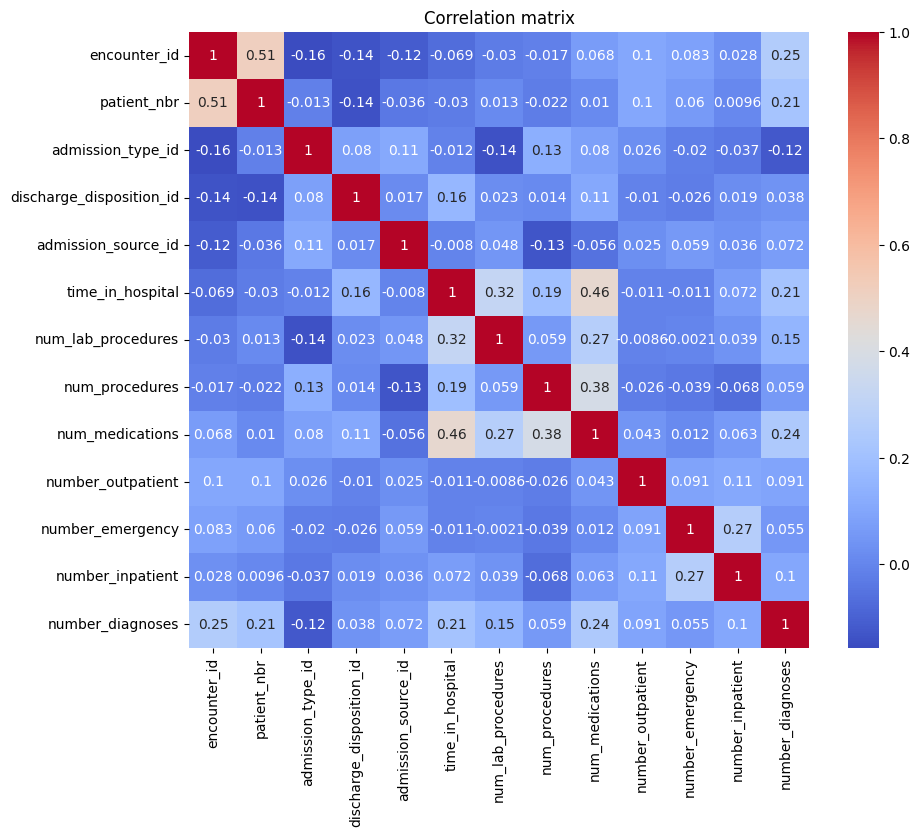

In [314]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

The correlation matrix was computed only for numerical variables, since correlation coefficients are meaningful only for quantitative data. 

Most numerical variables are weakly correlated, indicating low redundancy.

A few moderate correlations exist between time_in_hospital, num_medications, and num_lab_procedures, which is medically coherent. Because, Longer hospital stays are associated with more lab tests and medications, and patients with more emergency visits tend to have slightly more inpatient admissions.

Identifiers such as encounter_id and patient_nbr should be dropped, as they do not carry useful information for prediction.

8. Outliers analysis 


We do not perform an outlier analysis because most features are categorical, and the others are medical measures (e.g., glucose, BMI) whose extreme values may represent real medical conditions rather than data errors.  


9. Droping unnecessary  columns 

In [315]:
df.drop(columns=["encounter_id","patient_nbr"], inplace=True)
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

10. Encoding categorical columns 

In [316]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


Based on the unique values we will choose between binary encoding and one-hot encoding

In [317]:
cols = ['max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

for col in cols:
    print(f"--- {col} ---")
    print(df[col].unique(), "\n")


--- max_glu_serum ---
['Test not taken' '>300' 'Norm' '>200'] 

--- A1Cresult ---
['Test not taken' '>7' '>8' 'Norm'] 

--- metformin ---
['No' 'Steady' 'Up' 'Down'] 

--- repaglinide ---
['No' 'Up' 'Steady' 'Down'] 

--- nateglinide ---
['No' 'Steady' 'Down' 'Up'] 

--- chlorpropamide ---
['No' 'Steady' 'Down' 'Up'] 

--- glimepiride ---
['No' 'Steady' 'Down' 'Up'] 

--- acetohexamide ---
['No' 'Steady'] 

--- glipizide ---
['No' 'Steady' 'Up' 'Down'] 

--- glyburide ---
['No' 'Steady' 'Up' 'Down'] 

--- tolbutamide ---
['No' 'Steady'] 

--- pioglitazone ---
['No' 'Steady' 'Up' 'Down'] 

--- rosiglitazone ---
['No' 'Steady' 'Up' 'Down'] 

--- acarbose ---
['No' 'Steady' 'Up' 'Down'] 

--- miglitol ---
['No' 'Steady' 'Down' 'Up'] 

--- troglitazone ---
['No' 'Steady'] 

--- tolazamide ---
['No' 'Steady' 'Up'] 

--- examide ---
['No'] 

--- citoglipton ---
['No'] 

--- insulin ---
['Up' 'No' 'Steady' 'Down'] 

--- glyburide-metformin ---
['No' 'Steady' 'Down' 'Up'] 

--- glipizide-metfo

In [318]:
#binary encoding
df["change"] = df["change"].map({"Ch": 1, "No": 0})
df["diabetesMed"] = df["diabetesMed"].map({"Yes": 1, "No": 0})
df['gender']=df['gender'].map({"Female": 1, "Male": 0})

# List of columns needing dummies
dummy_cols = [
    'race','age','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
    'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
    'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
    'tolazamide','examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
    'metformin-pioglitazone',"diag_1","diag_2", "diag_3"
]

# One-hot encoding
df = pd.get_dummies(df, columns=dummy_cols, drop_first=False)

df['readmitted'] = df['readmitted'].map({'NO':0, '>30':1, '<30':2}) #because it is our target variable, label encoding


In [319]:
for col in df.columns:
    print(col)


gender
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
change
diabetesMed
readmitted
race_AfricanAmerican
race_Asian
race_Caucasian
race_Hispanic
race_Other
age_[0-10)
age_[10-20)
age_[20-30)
age_[30-40)
age_[40-50)
age_[50-60)
age_[60-70)
age_[70-80)
age_[80-90)
age_[90-100)
max_glu_serum_>200
max_glu_serum_>300
max_glu_serum_Norm
max_glu_serum_Test not taken
A1Cresult_>7
A1Cresult_>8
A1Cresult_Norm
A1Cresult_Test not taken
metformin_Down
metformin_No
metformin_Steady
metformin_Up
repaglinide_Down
repaglinide_No
repaglinide_Steady
repaglinide_Up
nateglinide_Down
nateglinide_No
nateglinide_Steady
nateglinide_Up
chlorpropamide_Down
chlorpropamide_No
chlorpropamide_Steady
chlorpropamide_Up
glimepiride_Down
glimepiride_No
glimepiride_Steady
glimepiride_Up
acetohexamide_No
acetohexamide_Steady
glipizide_Down
glipizide_No
glipizide_Steady
gli

11. Scaling for sensitive models 

In [320]:
numeric_cols = df.select_dtypes(include='number').columns

# 2. Initialize scaler
scaler = StandardScaler()

# 3. Fit and transform only the numeric data
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [321]:
df_scaled

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_3_V61,diag_3_V62,diag_3_V63,diag_3_V64,diag_3_V65,diag_3_V66,diag_3_V70,diag_3_V72,diag_3_V85,diag_3_V86
1,0.925141,-0.707403,-0.518587,0.300448,-0.475091,0.804179,-0.790607,0.231901,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False
2,0.925141,-0.707403,-0.518587,0.300448,-0.809197,-1.630894,2.135942,-0.384741,1.265141,-0.214725,...,False,False,False,False,False,False,False,False,False,False
3,-1.080917,-0.707403,-0.518587,0.300448,-0.809197,0.043219,-0.205297,-0.014756,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False
4,-1.080917,-0.707403,-0.518587,0.300448,-1.143304,0.398334,-0.790607,-1.001383,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False
5,-1.080917,-0.017800,-0.518587,-0.927565,-0.475091,-0.616280,2.721252,-0.014756,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,-1.080917,-0.707403,-0.141894,0.300448,-0.475091,0.398334,-0.790607,-0.014756,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False
101762,0.925141,-0.707403,0.046452,-0.190758,0.193122,-0.514819,0.965323,0.231901,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False
101763,-1.080917,-0.707403,-0.518587,0.300448,-1.143304,0.499795,-0.790607,-0.878055,0.485932,-0.214725,...,False,False,False,False,False,False,False,False,False,False
101764,0.925141,-0.017800,-0.141894,0.300448,1.863653,0.093950,0.380013,0.601886,-0.293277,-0.214725,...,False,False,False,False,False,False,False,False,False,False


We normalized the numerical variables to ensure all features contribute equally to the model.

12. Train test split 

In [322]:
X_scaled = df_scaled.drop(columns = ["readmitted"])
X = df.drop(columns = ["readmitted"])
y= df['readmitted']

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)                                                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


13. First model - RandomClassifier 

In [323]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Prédictions
y_pred = model.predict(X_test)

# 6. Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.575
